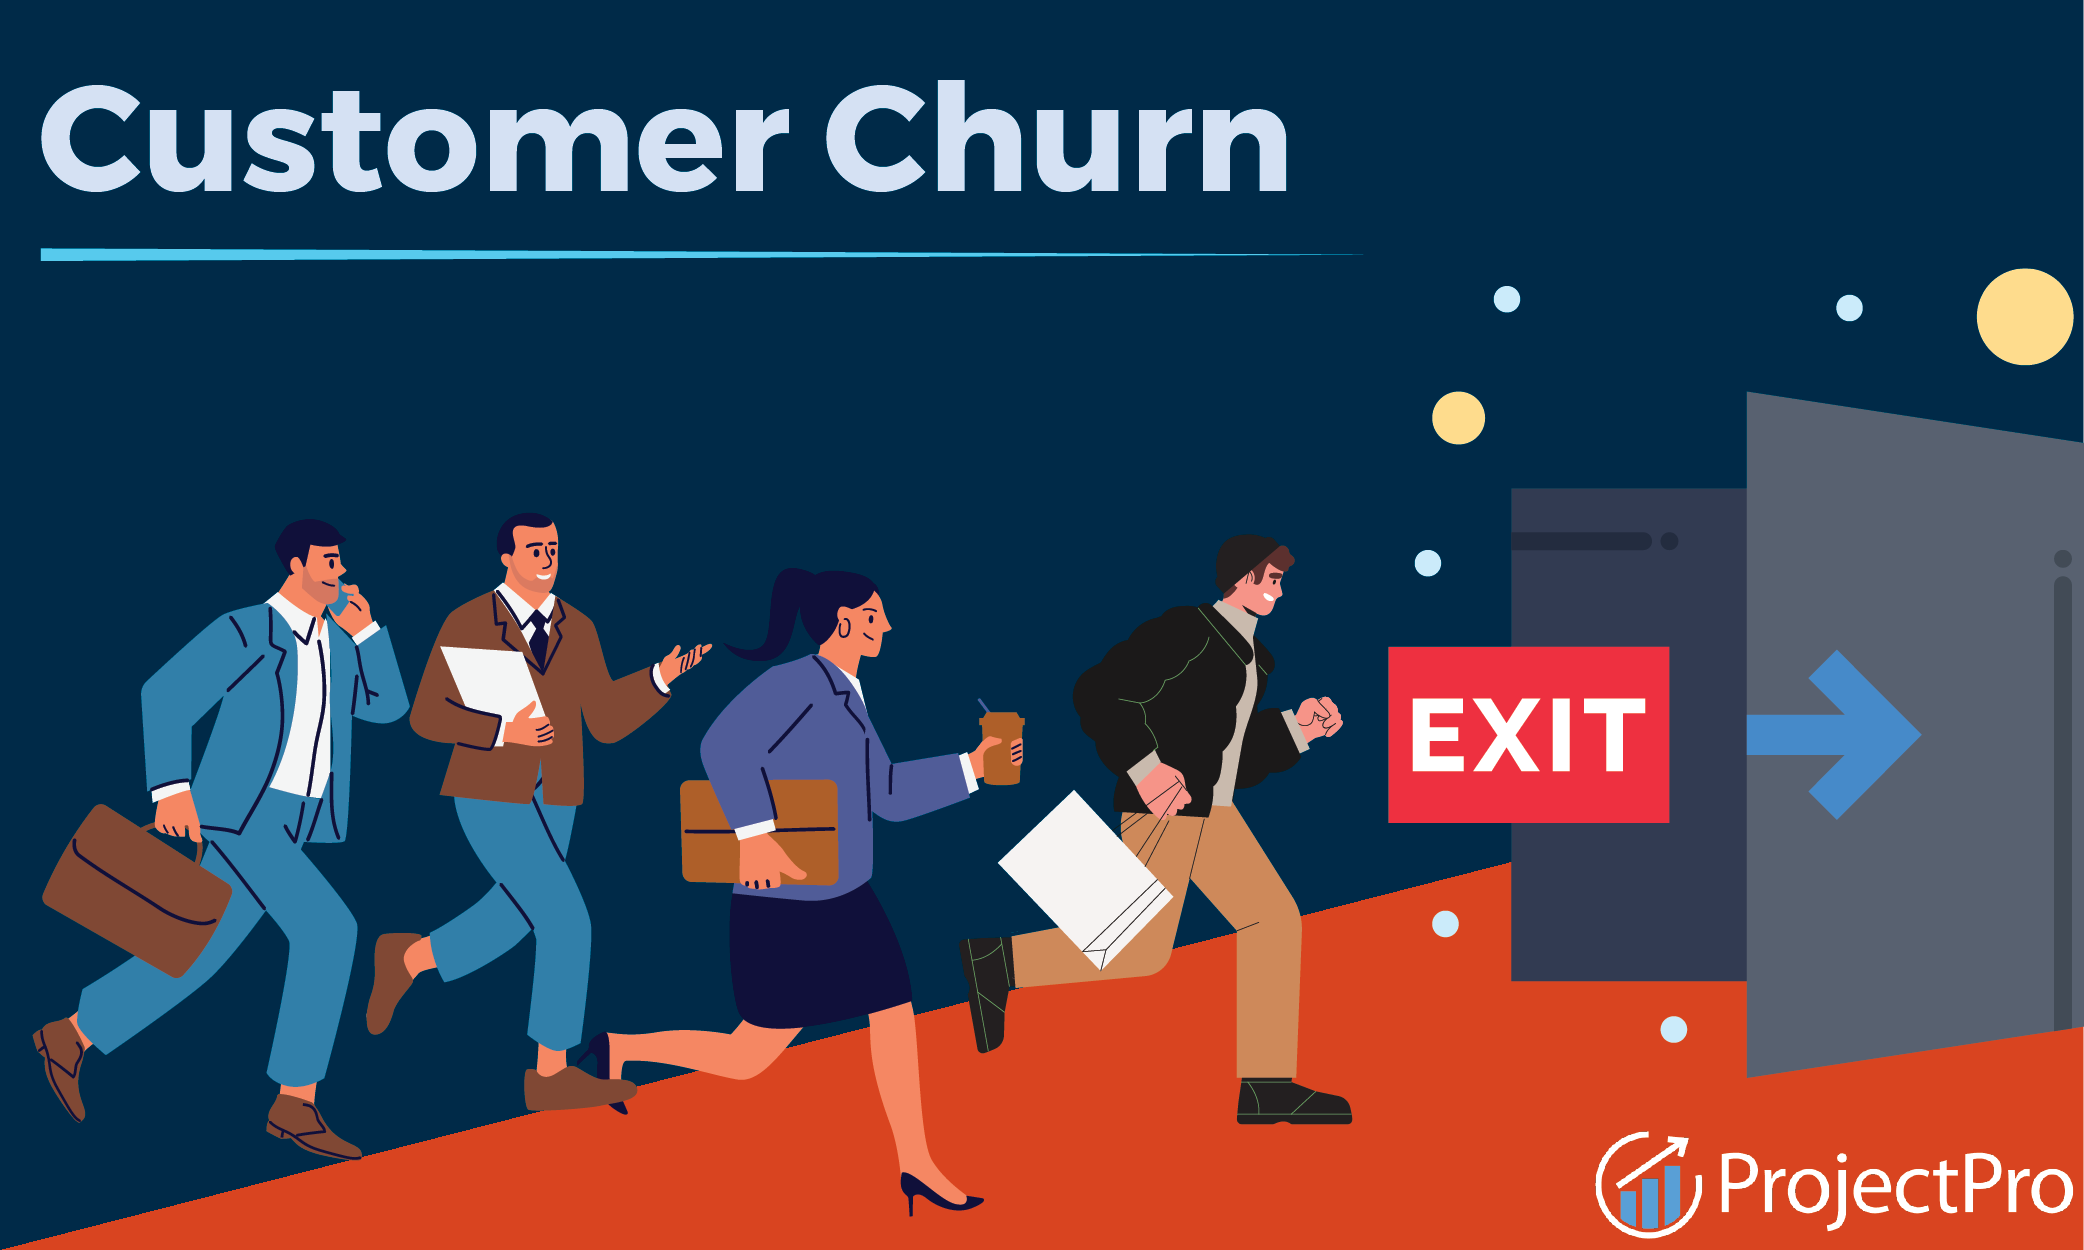

## INTRODUCTION

Welcome to ConnectTel, a leading telco provider committed to seamless connectivity. In my pursuit of excellence, I am leveraging Python and it's libraries to understand and address customer churn. This analysis aims to uncover key factors behind attrition, enable us enhance services and implement targeted retention strategies. Join me on this data-driven journey to fortify ConnectTel's position as the preferred choice for unparalleled telecommunications experiences.










## ABOUT DATASET

1.Customers who left within the last month – the column is called Churn

2.Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

3.Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

4.Demographic info about customers – gender, age range, and if they have partners and dependents

## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Reading the Data

In [2]:


df = pd.read_csv('Telco Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## DATA EXPLORATION

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.shape

(7043, 21)

In [5]:
df.duplicated().sum()


0

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## DATA CLEANING

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
## converting 'SeniorCitizen' column from numeric to object data type for better visualization
df['SeniorCitizen'] =df['SeniorCitizen'].replace(1,'yes')
df['SeniorCitizen'] =df['SeniorCitizen'].replace(0,'no')

In [10]:
df['SeniorCitizen'].unique()

array(['no', 'yes'], dtype=object)

In [11]:
## changing Total charges column to numeric
print(df['TotalCharges'].dtype)


object


In [12]:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].astype(float)


In [13]:
df['TotalCharges'].dtype


dtype('float64')

In [14]:
df['TotalCharges'].isnull().sum()

11

 some missing values in the total charges column were found but the ratio is small to the data size and were lost completely at random so dropping them will not affect the data analyis.

In [15]:
##dropping missing values from total charges column

df.dropna(subset=['TotalCharges'],inplace=True)

In [16]:
df['TotalCharges'].isnull().sum()

0

## Exploratory Analysis

In [17]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### What is the gender ratio in the company?

<function matplotlib.pyplot.show(close=None, block=None)>

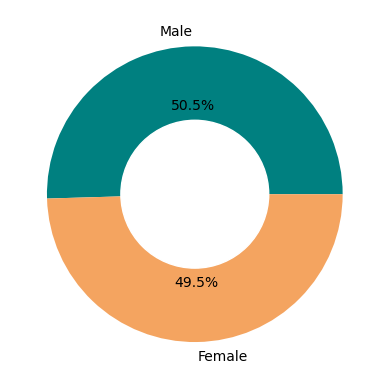

In [18]:
##ploting a donut chart
gender_rate =df['gender'].value_counts()
plt.pie(gender_rate.values,labels=gender_rate.index,colors = ['teal', 'sandybrown'],autopct='%1.1f%%')
##add acirlce
my_circle =plt.Circle((0,0),0.5,color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show

The gender distribution among customers reveals a nearly balanced representation, with males constituting approximately 50.5% of the total customer base and females comprising 49.5%. This suggests that the company's services cater to a broad and inclusive audience.

#### What is the overall churn ratio in the company?

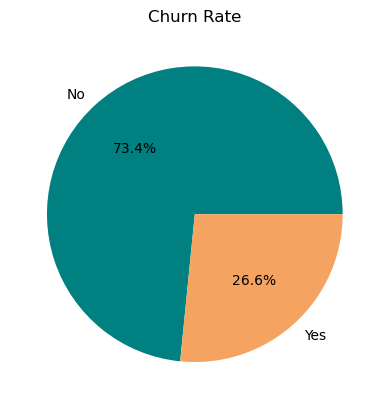

In [19]:
churn_counts = df['Churn'].value_counts() 
custom_colors = ['teal', 'sandybrown']
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=custom_colors)  
plt.title('Churn Rate')
plt.show()


There's a churn ratio of 0.2657, or approximately 26.6%, this means that around 26.6% of the customers in the company have churned

#### How does Gender affect churn rate? / Are customers with partners less likely to churn compared to those without partners?

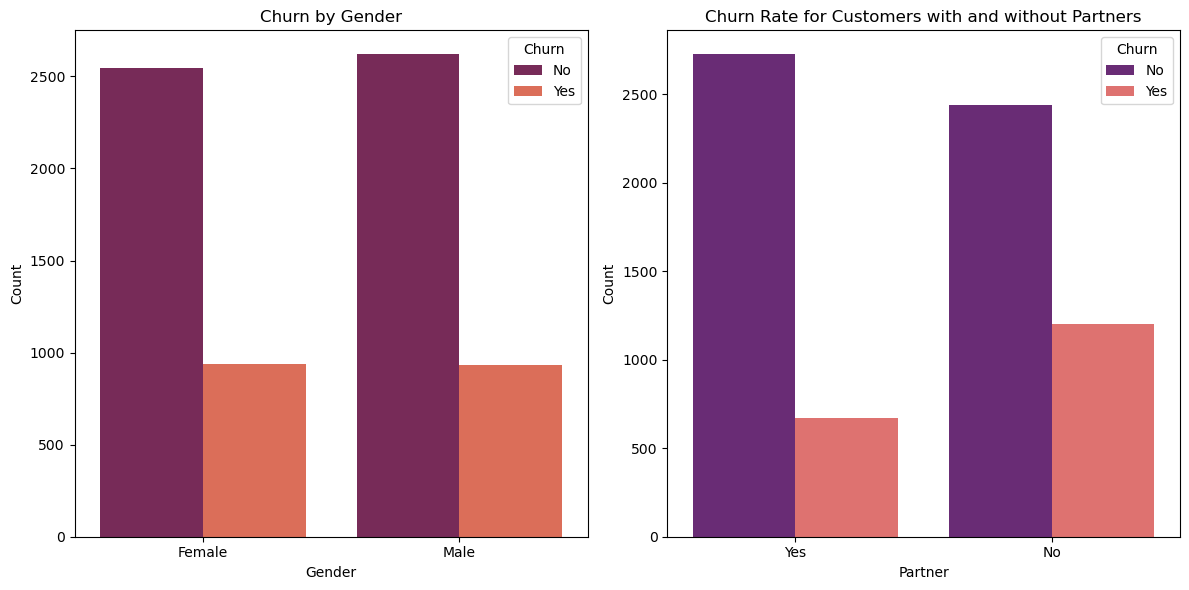

In [20]:


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Churn by Gender
sns.countplot(x='gender', hue='Churn', data=df, palette='rocket', ax=axes[0])
axes[0].set_title('Churn by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Churn Rate for Customers with and without Partners
sns.countplot(x='Partner', hue='Churn', data=df, palette='magma', ax=axes[1])
axes[1].set_title('Churn Rate for Customers with and without Partners')
axes[1].set_xlabel('Partner')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()


There is no specific gender that's most likely to churn, this suggests that gender does not affect the churning. 

Nevertheless, a noteworthy finding emerges when considering the presence of partners. Customers with partners exhibit a notable stability, with a significant majority still with the company. Conversely, customers without partners, while still displaying a substantial loyal segment, display a high propensity to churn. 

#### Does being a senior citizen / having dependents influence the likelihood of churn?

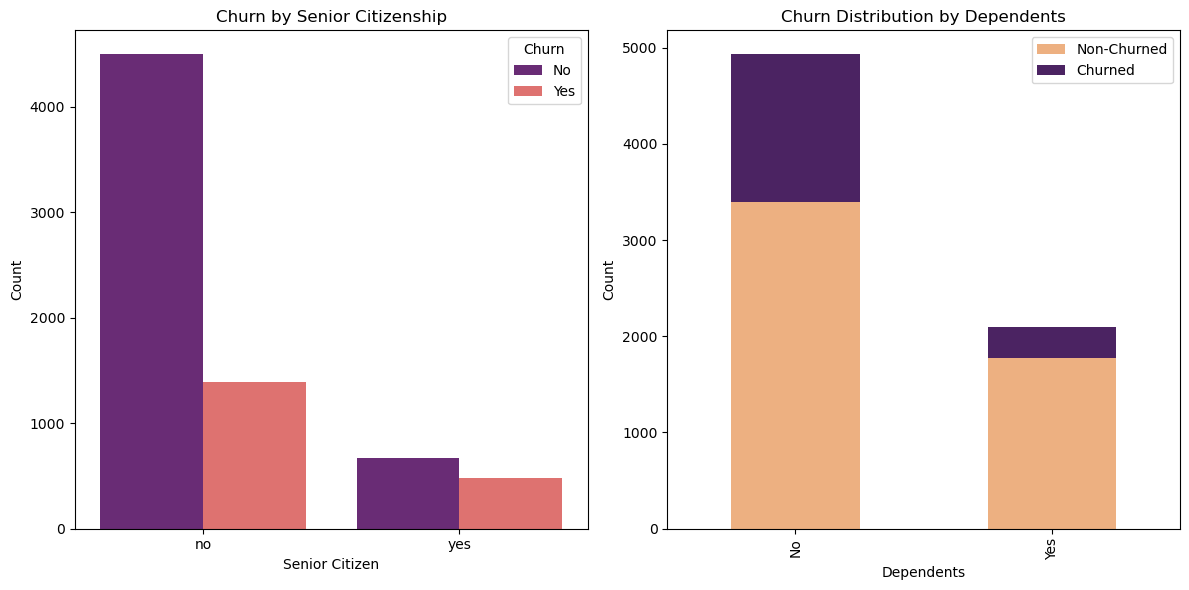

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))


sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette="magma", ax=axes[0])
axes[0].set_title('Churn by Senior Citizenship')
axes[0].set_xlabel('Senior Citizen')
axes[0].set_ylabel('Count')

# Churn Distribution by Dependents
df_grouped = df.groupby(['Dependents', 'Churn']).size().unstack()
df_grouped.plot(kind='bar', stacked=True, colormap='flare', ax=axes[1])
axes[1].set_title('Churn Distribution by Dependents')
axes[1].set_xlabel('Dependents')
axes[1].set_ylabel('Count')
axes[1].legend(['Non-Churned', 'Churned'])

# Adjust layout
plt.tight_layout()
plt.show()


This pattern in senior citizenship suggests a more balanced distribution in the likelihood of churn among senior citizens compared to non-senior citizens. It can be noticed that regardless the ratio of senior citizens among the customers is lower, the likelihood of churn is high for senior citizens compared to non-senior citizens.

Nevertheless,most of the customers don't have dependents, and they also more likely to leave compared to customers with dependents.

 #### Is there a correleation between tenure and churn rate?

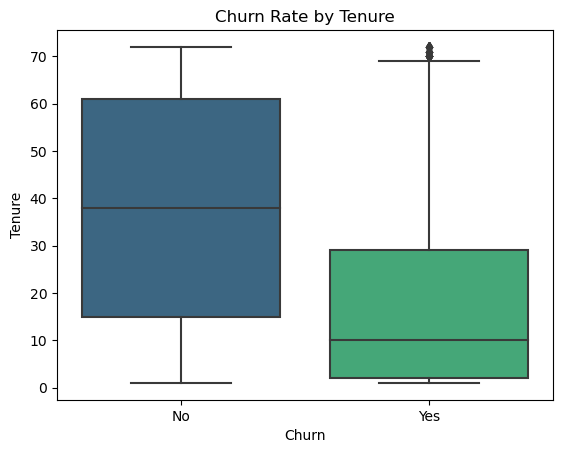

In [22]:
sns.boxplot(x='Churn', y='tenure',data =df, palette ='viridis')
plt.title('Churn Rate by Tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

This chart suggests that customers with shorter tenures of averagely 10years desmonstrate a higher propensity to churn.

#### What is the distribution of customers that have assess to phone services /  Does the presence or absence of phone service impact churn behavior?

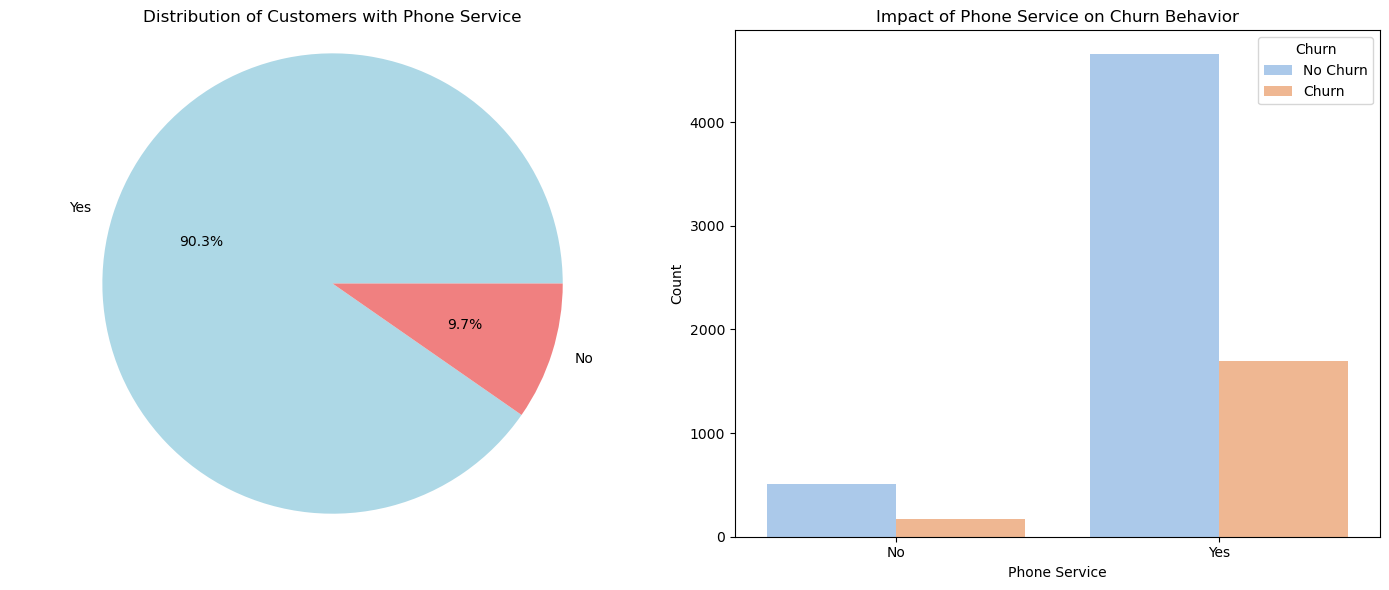

In [23]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Pie Chart: Distribution of customers with and without phone service
phone_service_counts = df['PhoneService'].value_counts()
axes[0].pie(phone_service_counts, labels=phone_service_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
axes[0].set_title('Distribution of Customers with Phone Service')
axes[0].axis('equal')  

# Bar Chart: Impact of phone service on churn behavior
sns.countplot(x='PhoneService', hue='Churn', data=df, palette='pastel', ax=axes[1])
axes[1].set_title('Impact of Phone Service on Churn Behavior')
axes[1].set_xlabel('Phone Service')
axes[1].set_ylabel('Count')
axes[1].legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.tight_layout()
plt.show()


Majority of customers represented by 93% use phone services whilst 9.7% do not.

There is a fair ratio of the churn rate between having(26.7%) or not having the phone service( 25.0%),this suggests that  phone service may not have a direct effect on churn.

 #### How much charges do the customers mostly pay? /Describe the distribution of the Total charge column

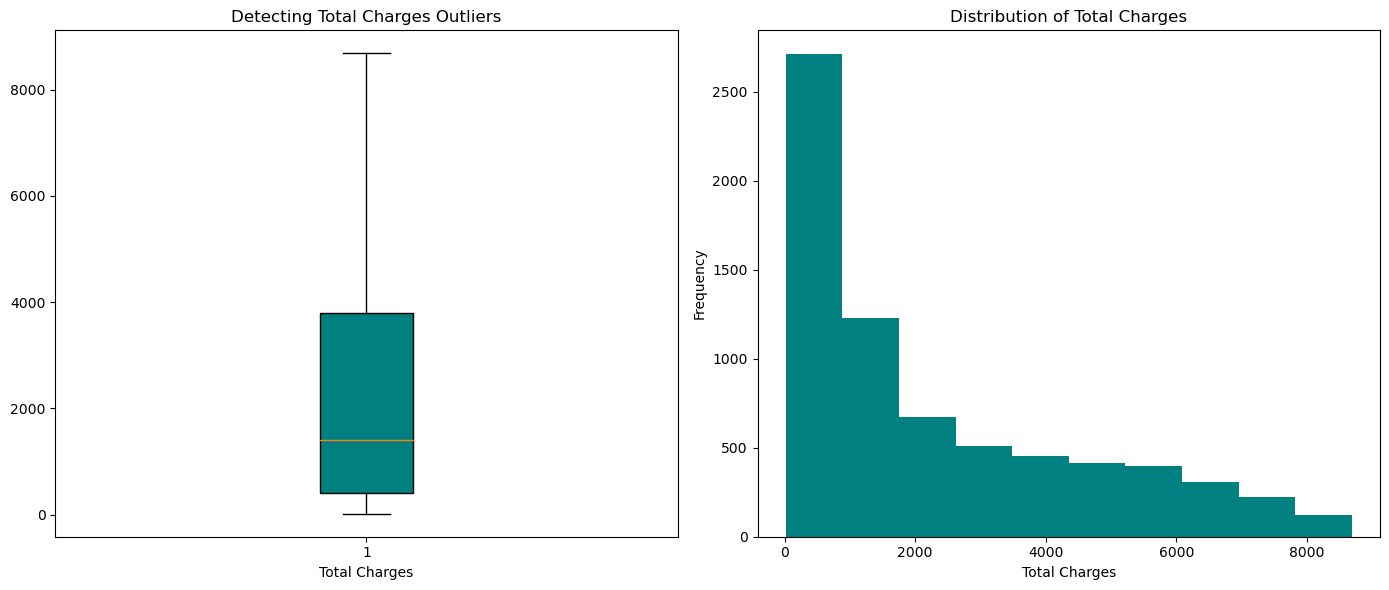

In [24]:

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Boxplot
axes[0].boxplot(df['TotalCharges'], patch_artist=True, boxprops=dict(facecolor='teal'))
axes[0].set_title('Detecting Total Charges Outliers')
axes[0].set_xlabel('Total Charges')

# Histogram
axes[1].hist(df['TotalCharges'], bins=10, color='teal')
axes[1].set_title('Distribution of Total Charges')
axes[1].set_xlabel('Total Charges')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


From this chart we can observe that there are not outliers when it comes to total charges, this suggests that the charges imposed on customers tend to follow a relatively consistent pattern.

The distribution of total charges seems skewed as most customers pay less than $2000.It can be observed that  the number of customers decreases as charges increases

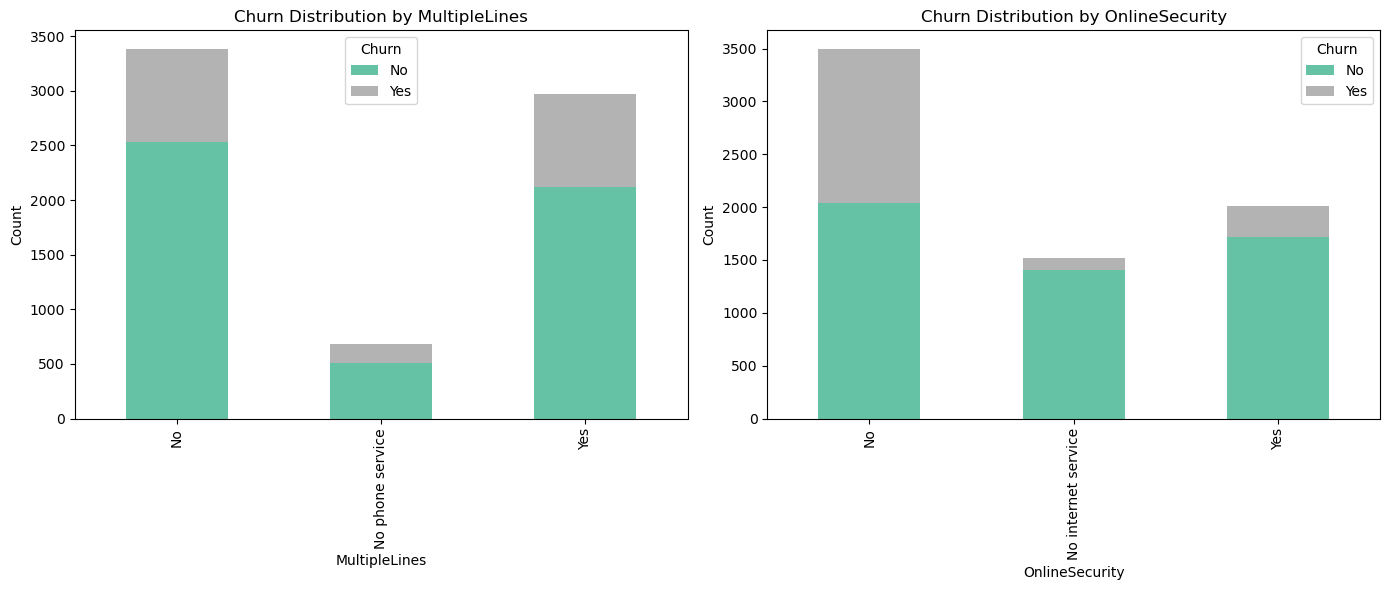

In [25]:

custom_palette = "Set2"
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Churn Distribution by MultipleLines
df_grouped_multiple_lines = df.groupby(["MultipleLines", "Churn"]).size().unstack()
df_grouped_multiple_lines.plot(kind="bar", stacked=True, ax=axes[0], colormap=custom_palette)
axes[0].set_title("Churn Distribution by MultipleLines")
axes[0].set_xlabel("MultipleLines")
axes[0].set_ylabel("Count")

# Churn Distribution by OnlineSecurity
df_grouped_online_security = df.groupby(["OnlineSecurity", "Churn"]).size().unstack()
df_grouped_online_security.plot(kind="bar", stacked=True, ax=axes[1], colormap=custom_palette)
axes[1].set_title("Churn Distribution by OnlineSecurity")
axes[1].set_xlabel("OnlineSecurity")
axes[1].set_ylabel("Count")
plt.tight_layout()
plt.show()


 The portion of customers who have phone services but without multiple lines is a little higher than those who have multiple lines, it can also be noticed that there's a little proportion of customers who don't use phone service churned.
Nevertheless ,there is no significant diffference in churning rate between customers with Multiple lines and those without multiple lines.


In respect to Online Security, the larger ratio of the customers don't have Online security service, and it appears that they tend to churn more than the customers with online security

#### Which internet Service Provider has the highest churn rate?

Text(0.5, 1.0, 'Churn Rate by Internet Service')

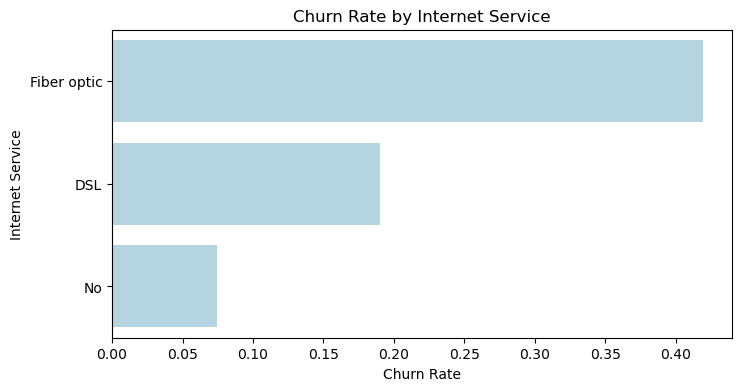

In [26]:
df['Churn_N'] = df["Churn"].map({"Yes":1, "No": 0})
internet_churn = df.groupby("InternetService")["Churn_N"].mean().reset_index()
internet_churn = internet_churn.sort_values("Churn_N", ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x = "Churn_N", y="InternetService", data = internet_churn, color = "lightblue")
plt.xlabel("Churn Rate")
plt.ylabel("Internet Service")
plt.title("Churn Rate by Internet Service")

Based on the visualization, Fiber Optic appears to have the internet service with the  highest churning rate

Features that have an influence on the churn rate:

SeniorCitizen

Partner

Dependents

Tenure

InternetService

OnlineSecurity

Features that don't have an influence on the churn rate:

Gender 

Total Charges

PhoneService

MultipleLines